In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('IRIS.CSV')

In [3]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
dataset.duplicated().sum()

3

In [7]:
dataset=dataset.drop_duplicates()

In [8]:
dataset.duplicated().sum()

0

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


<AxesSubplot:xlabel='species', ylabel='count'>

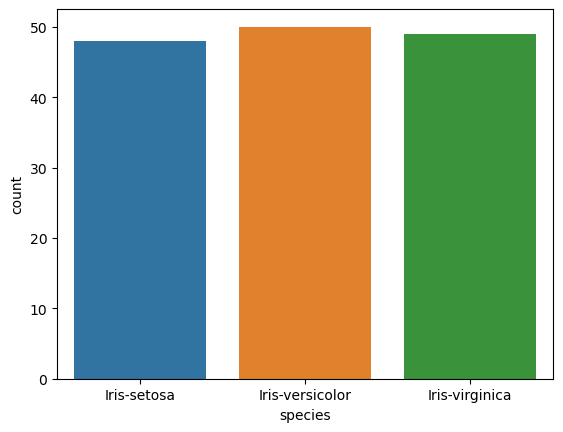

In [10]:
import seaborn as sns
sns.countplot(x=dataset['species'])

In [11]:
dataset['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
dataset['species']=dataset['species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [13]:
dataset.head(70)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
67,5.8,2.7,4.1,1.0,1
68,6.2,2.2,4.5,1.5,1
69,5.6,2.5,3.9,1.1,1
70,5.9,3.2,4.8,1.8,1


In [14]:
X=dataset.drop('species',axis=1)
y=dataset['species']

# train_test_split

In [15]:
from sklearn.model_selection import train_test_split ,GridSearchCV
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

# GridSearchCV

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=3)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_



In [17]:
print(best_model)

RandomForestClassifier(min_samples_split=5, n_estimators=50, random_state=42)


# RandomForestClassifier

In [18]:

model = RandomForestClassifier(min_samples_split=5, n_estimators=50, random_state=42)
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
train=model.score(X_train,y_train)
print("Train accuracy", train)
accuracy=accuracy_score(y_test,y_pred)
print("Test Accuracy:", accuracy)


Train accuracy 0.9829059829059829
Test Accuracy: 0.9333333333333333


In [19]:
report = classification_report(y_test, y_pred)
print(report )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



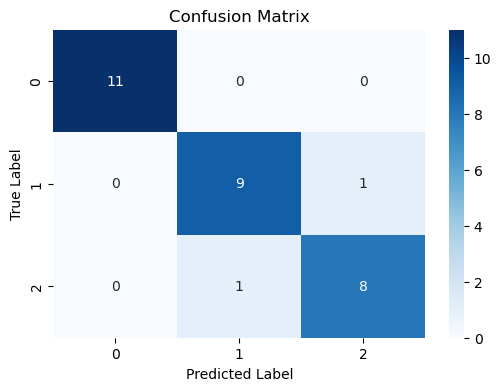

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# SVC

In [22]:
from sklearn.svm import SVC

In [23]:
model=SVC(C= 100, gamma= 0.01)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
train=model.score(X_train,y_train)
print("Train Accuracy",train)
accuracy=accuracy_score(y_test,y_pred)
print("Test Accuracy:", accuracy)


Train Accuracy 0.9829059829059829
Test Accuracy: 0.9666666666666667


In [24]:
report = classification_report(y_test, y_pred)
print(report )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



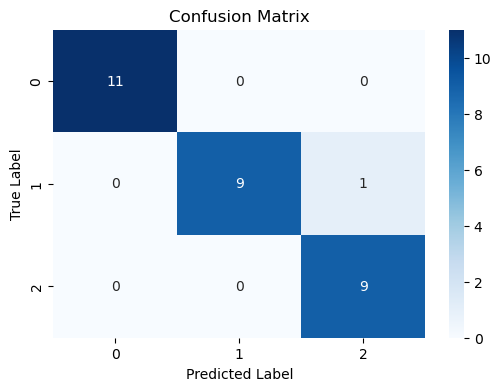

In [25]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()